In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics


In [2]:
task_name = 'ESOL'

# predictions for molecules with and without substructure masks
data_path_mol = '../prediction/summary/' + task_name + '_mol_prediction_summary.csv'
data_path_smask_fg = '../prediction/summary/' + task_name + '_fg_prediction_summary.csv'
data_path_smask_brics = '../prediction/summary/' + task_name + '_brics_prediction_summary.csv'
data_path_smask_brics_emerge = '../prediction/summary/' + task_name + '_brics_emerge_prediction_summary.csv'
data_path_smask_murcko = '../prediction/summary/' + task_name + '_murcko_prediction_summary.csv'
data_path_smask_murcko_emerge = '../prediction/summary/' + task_name + '_murcko_emerge_prediction_summary.csv'

# attribution scores for the substructure masks
path_smask_fg_attribution = '../prediction/attribution/' + task_name + '_fg_attribution_summary.csv'
path_smask_brics_attribution = '../prediction/attribution/' + task_name + '_brics_attribution_summary.csv'
path_smask_brics_emerge_attribution = '../prediction/attribution/' + task_name + '_brics_emerge_attribution_summary.csv'
path_smask_murcko_attribution = '../prediction/attribution/' + task_name + '_murcko_attribution_summary.csv'
path_smask_murcko_emerge_attribution = '../prediction/attribution/' + task_name + '_murcko_emerge_attribution_summary.csv'


In [3]:
# load data
data_mol = pd.read_csv(data_path_mol)
data_smask_fg = pd.read_csv(data_path_smask_fg)
data_smask_brics = pd.read_csv(data_path_smask_brics)
data_smask_brics_emerge = pd.read_csv(data_path_smask_brics_emerge)
data_smask_murcko = pd.read_csv(data_path_smask_murcko)
data_smask_murcko_emerge = pd.read_csv(data_path_smask_murcko_emerge)

data_smask_fg_attribution = pd.read_csv(path_smask_fg_attribution)
data_smask_brics_attribution = pd.read_csv(path_smask_brics_attribution)
data_smask_brics_emerge_attribution = pd.read_csv(path_smask_brics_emerge_attribution)
data_smask_murcko_attribution = pd.read_csv(path_smask_murcko_attribution)
data_smask_murcko_emerge_attribution = pd.read_csv(path_smask_murcko_emerge_attribution)

In [4]:
data_mol

,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std
0,BrC(Br)(Br)Br,-3.140,noname,val,-4.227953,-3.940488,-3.295109,-3.557530,-3.782461,-3.470909,-3.540233,-3.413007,-3.559703,-3.839030,-3.662642,0.281471
1,BrC(Br)Br,-1.910,noname,training,-2.261995,-1.545559,-1.937757,-1.689099,-2.201426,-1.906676,-2.111352,-1.869021,-2.000462,-1.919110,-1.944246,0.218578
2,BrCBr,-1.170,noname,training,-1.208157,-0.626678,-0.964054,-0.951258,-1.051193,-0.958669,-1.018968,-1.065421,-1.353774,-0.802799,-1.000097,0.199828
3,BrCCBr,-3.239,noname,test,-3.811258,-3.889476,-3.837942,-3.420316,-4.418723,-4.005477,-4.456253,-3.781219,-3.631902,-4.045825,-3.929839,0.321437
4,Brc1cc(Br)c(Br)cc1Br,-6.980,noname,test,-6.088015,-5.845384,-5.804754,-6.035960,-5.854385,-5.868169,-6.050452,-6.306243,-6.129872,-6.442122,-6.042536,0.210878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,c1ccoc1,-0.820,noname,training,-0.490465,-0.149429,-0.818776,-0.754826,-0.052341,-0.442616,-0.193339,-0.350994,-0.730613,0.512238,-0.347116,0.401878
1105,c1ccsc1,-1.330,noname,training,-1.312204,-0.882240,-1.167674,-1.048650,-0.905743,-0.957825,-0.995053,-0.972306,-1.427791,-0.735132,-1.040462,0.208183
1106,c1cnc2c(c1)ccc1ncccc12,-2.680,noname,val,-3.091598,-3.362226,-2.677367,-3.359851,-3.033963,-3.356961,-3.247158,-3.487690,-2.132882,-3.210172,-3.095987,0.408876
1107,c1cnc2ncncc2n1,-2.220,noname,training,-2.199737,-2.216534,-2.223428,-1.908045,-2.067102,-2.434213,-2.217954,-2.302197,-2.206742,-2.405153,-2.218111,0.152095


In [5]:
def metric_result(data, metric=metrics.accuracy_score):    

    y_true_list = data['label'].tolist()

    if metric == metrics.accuracy_score:
        y_pred_label = [1 if x >= 0.5 else 0 for x in data['pred_mean'].tolist()]
    elif metric == metrics.r2_score:
        y_pred_label = data['pred_mean'].tolist()
    elif metric == metrics.mean_squared_error:
        y_pred_label = data['pred_mean'].tolist()
    else: 
        print('metric not supported')

    return round(metric(y_true_list, y_pred_label), 4)

In [6]:
print("R2 on training set", metric_result(data_mol[data_mol['group'] == 'training'], metric=metrics.r2_score))
print("R2 on test set", metric_result(data_mol[data_mol['group'] == 'test'], metric=metrics.r2_score))
print("R2 on val set", metric_result(data_mol[data_mol['group'] == 'val'], metric=metrics.r2_score))

R2 on training set 0.9691
R2 on test set 0.8964
R2 on val set 0.9483


In [7]:
# mean squared error
print("MSE on training set", metric_result(data_mol[data_mol['group'] == 'training'], metric=metrics.mean_squared_error))
print("MSE on test set", metric_result(data_mol[data_mol['group'] == 'test'], metric=metrics.mean_squared_error))
print("MSE on val set", metric_result(data_mol[data_mol['group'] == 'val'], metric=metrics.mean_squared_error))

MSE on training set 0.1368
MSE on test set 0.3497
MSE on val set 0.2612


In [8]:
# count number of molecules in each set (train, test, val), also include what percentage of total data that is
print("Number of molecules in training set", len(data_mol[data_mol['group'] == 'training']), ", percentage of total data", round(len(data_mol[data_mol['group'] == 'training'])/len(data_mol)*100, 2), "%")
print("Number of molecules in test set", len(data_mol[data_mol['group'] == 'test']), ", percentage of total data", round(len(data_mol[data_mol['group'] == 'test'])/len(data_mol)*100, 2), "%")
print("Number of molecules in val set", len(data_mol[data_mol['group'] == 'val']), ", percentage of total data", round(len(data_mol[data_mol['group'] == 'val'])/len(data_mol)*100, 2), "%")


Number of molecules in training set 886 , percentage of total data 79.89 %
Number of molecules in test set 112 , percentage of total data 10.1 %
Number of molecules in val set 111 , percentage of total data 10.01 %


# Evaluation of test set

In [9]:
data = data_mol[data_mol['group'] == 'test']
data 

,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std
3,BrCCBr,-3.239,noname,test,-3.811258,-3.889476,-3.837942,-3.420316,-4.418723,-4.005477,-4.456253,-3.781219,-3.631902,-4.045825,-3.929839,0.321437
4,Brc1cc(Br)c(Br)cc1Br,-6.980,noname,test,-6.088015,-5.845384,-5.804754,-6.035960,-5.854385,-5.868169,-6.050452,-6.306243,-6.129872,-6.442122,-6.042536,0.210878
10,Brc1cccc(Br)c1,-1.640,noname,test,-1.957384,-1.467999,-1.949383,-1.576386,-1.801967,-1.795498,-2.011270,-1.811547,-1.756321,-1.630147,-1.775790,0.175437
11,Brc1cccc2ccccc12,-4.350,noname,test,-4.525475,-4.681284,-4.093064,-4.579244,-4.452198,-4.752861,-4.821397,-4.776759,-4.648643,-4.996603,-4.632753,0.245850
29,C#CCCCCCCC,-4.240,noname,test,-4.826696,-4.051616,-4.426555,-4.235332,-4.721448,-4.289906,-4.753340,-4.299534,-4.593443,-4.288035,-4.448591,0.259914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,c1ccc2c(c1)CCCC2,-4.370,noname,test,-4.024399,-3.374808,-3.513880,-3.697897,-3.611320,-4.078349,-4.260634,-3.706676,-4.305344,-3.714626,-3.828793,0.318290
1077,c1ccc2c(c1)CCN2,-0.900,noname,test,-0.275896,-0.046355,-0.166580,-0.421256,-0.095682,-0.124790,-0.235193,-0.090857,-0.823202,-0.149365,-0.242918,0.231337
1079,c1ccc2c(c1)Cc1cc3ccccc3cc1-2,-4.955,noname,test,-4.104719,-3.809244,-3.526002,-3.644733,-3.730493,-3.927884,-3.496826,-2.772612,-3.937902,-3.482440,-3.643286,0.370437
1090,c1ccc2c3c(ccc2c1)-c1cccc2cccc-3c12,-3.021,noname,test,-4.072359,-4.248318,-3.767392,-4.250380,-3.816659,-4.074932,-4.561656,-4.496193,-3.856045,-4.093948,-4.123788,0.270986


In [10]:
# add column to data for the predicted label (same as the mean prediction)
data['pred_label'] = data['pred_mean']

# add two new columns for correctness measures (mean squared error)
for row in data.iterrows():
    data.loc[row[0], 'mse'] = metrics.mean_squared_error([data.loc[row[0], 'label']], [data.loc[row[0], 'pred_label']])
    

/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [11]:
data

,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std,pred_label,mse
3,BrCCBr,-3.239,noname,test,-3.811258,-3.889476,-3.837942,-3.420316,-4.418723,-4.005477,-4.456253,-3.781219,-3.631902,-4.045825,-3.929839,0.321437,-3.929839,0.477258
4,Brc1cc(Br)c(Br)cc1Br,-6.980,noname,test,-6.088015,-5.845384,-5.804754,-6.035960,-5.854385,-5.868169,-6.050452,-6.306243,-6.129872,-6.442122,-6.042536,0.210878,-6.042536,0.878840
10,Brc1cccc(Br)c1,-1.640,noname,test,-1.957384,-1.467999,-1.949383,-1.576386,-1.801967,-1.795498,-2.011270,-1.811547,-1.756321,-1.630147,-1.775790,0.175437,-1.775790,0.018439
11,Brc1cccc2ccccc12,-4.350,noname,test,-4.525475,-4.681284,-4.093064,-4.579244,-4.452198,-4.752861,-4.821397,-4.776759,-4.648643,-4.996603,-4.632753,0.245850,-4.632753,0.079949
29,C#CCCCCCCC,-4.240,noname,test,-4.826696,-4.051616,-4.426555,-4.235332,-4.721448,-4.289906,-4.753340,-4.299534,-4.593443,-4.288035,-4.448591,0.259914,-4.448591,0.043510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,c1ccc2c(c1)CCCC2,-4.370,noname,test,-4.024399,-3.374808,-3.513880,-3.697897,-3.611320,-4.078349,-4.260634,-3.706676,-4.305344,-3.714626,-3.828793,0.318290,-3.828793,0.292904
1077,c1ccc2c(c1)CCN2,-0.900,noname,test,-0.275896,-0.046355,-0.166580,-0.421256,-0.095682,-0.124790,-0.235193,-0.090857,-0.823202,-0.149365,-0.242918,0.231337,-0.242918,0.431757
1079,c1ccc2c(c1)Cc1cc3ccccc3cc1-2,-4.955,noname,test,-4.104719,-3.809244,-3.526002,-3.644733,-3.730493,-3.927884,-3.496826,-2.772612,-3.937902,-3.482440,-3.643286,0.370437,-3.643286,1.720595
1090,c1ccc2c3c(ccc2c1)-c1cccc2cccc-3c12,-3.021,noname,test,-4.072359,-4.248318,-3.767392,-4.250380,-3.816659,-4.074932,-4.561656,-4.496193,-3.856045,-4.093948,-4.123788,0.270986,-4.123788,1.216142


### variance-based ensemble uncertainty

In [12]:
# add column to data that calculates the variance of the predictions (std^2)
data['uq_variance'] = data['pred_std'] ** 2
data

/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std,pred_label,mse,uq_variance
3,BrCCBr,-3.239,noname,test,-3.811258,-3.889476,-3.837942,-3.420316,-4.418723,-4.005477,-4.456253,-3.781219,-3.631902,-4.045825,-3.929839,0.321437,-3.929839,0.477258,0.103322
4,Brc1cc(Br)c(Br)cc1Br,-6.980,noname,test,-6.088015,-5.845384,-5.804754,-6.035960,-5.854385,-5.868169,-6.050452,-6.306243,-6.129872,-6.442122,-6.042536,0.210878,-6.042536,0.878840,0.044470
10,Brc1cccc(Br)c1,-1.640,noname,test,-1.957384,-1.467999,-1.949383,-1.576386,-1.801967,-1.795498,-2.011270,-1.811547,-1.756321,-1.630147,-1.775790,0.175437,-1.775790,0.018439,0.030778
11,Brc1cccc2ccccc12,-4.350,noname,test,-4.525475,-4.681284,-4.093064,-4.579244,-4.452198,-4.752861,-4.821397,-4.776759,-4.648643,-4.996603,-4.632753,0.245850,-4.632753,0.079949,0.060442
29,C#CCCCCCCC,-4.240,noname,test,-4.826696,-4.051616,-4.426555,-4.235332,-4.721448,-4.289906,-4.753340,-4.299534,-4.593443,-4.288035,-4.448591,0.259914,-4.448591,0.043510,0.067556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,c1ccc2c(c1)CCCC2,-4.370,noname,test,-4.024399,-3.374808,-3.513880,-3.697897,-3.611320,-4.078349,-4.260634,-3.706676,-4.305344,-3.714626,-3.828793,0.318290,-3.828793,0.292904,0.101308
1077,c1ccc2c(c1)CCN2,-0.900,noname,test,-0.275896,-0.046355,-0.166580,-0.421256,-0.095682,-0.124790,-0.235193,-0.090857,-0.823202,-0.149365,-0.242918,0.231337,-0.242918,0.431757,0.053517
1079,c1ccc2c(c1)Cc1cc3ccccc3cc1-2,-4.955,noname,test,-4.104719,-3.809244,-3.526002,-3.644733,-3.730493,-3.927884,-3.496826,-2.772612,-3.937902,-3.482440,-3.643286,0.370437,-3.643286,1.720595,0.137224
1090,c1ccc2c3c(ccc2c1)-c1cccc2cccc-3c12,-3.021,noname,test,-4.072359,-4.248318,-3.767392,-4.250380,-3.816659,-4.074932,-4.561656,-4.496193,-3.856045,-4.093948,-4.123788,0.270986,-4.123788,1.216142,0.073434


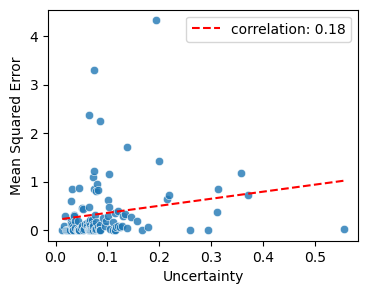

In [120]:
# plot the mse vs variance
plt.figure(figsize=(4, 3))
sns.scatterplot(x='uq_variance', y='mse', data=data, alpha=0.8)

# add a line that plots the relationship between mse and variance
p = np.poly1d(np.polyfit(data['uq_variance'], data['mse'], 1))
t = np.linspace(data['uq_variance'].min(), data['uq_variance'].max(), 100)
plt.plot(t, p(t), "r--", label="correlation: " + str(round(data['uq_variance'].corr(data['mse']), 2)))

plt.xlabel('Uncertainty')
plt.ylabel('Mean Squared Error')
plt.legend()
#plt.title('Mean Squared Error vs Variance')

# save as pdf
plt.savefig('mse_vs_variance.pdf', bbox_inches='tight')

plt.show()

In [105]:
# calculate the correlation between mse and variance
correlation = np.corrcoef(data['uq_variance'], data['mse'])[0, 1]
correlation

0.18345649655501683

In [128]:
# do a boxplot of the mse for differently large uncertainty 

subsets_mse = []
subsets_r2 = []
subset_uncertainty = []
n_subsets = 3

equal_size = True


for i in range(n_subsets):
    if equal_size:
        # sort data by uncertainty
        data = data.sort_values(by='uq_variance')
        subset = data.iloc[int(i * len(data) / n_subsets):int((i + 1) * len(data) / n_subsets)]
    else:
        # in this case, we just split the data into n_subsets based on the uncertainty score with the boundries per percentile
        subset = data[(data['uq_variance'] >= np.percentile(data['uq_variance'], i * 100 / n_subsets)) & (data['uq_variance'] < np.percentile(data['uq_variance'], (i + 1) * 100 / n_subsets))]

    uncertainties = subset['uq_variance']
    mses = subset['mse']
    subsets_mse.append(mses)
    subset_uncertainty.append(uncertainties)

    # calculate the r2 score for each subset
    r2 = metric_result(subset, metric=metrics.r2_score)
    subsets_r2.append(r2)








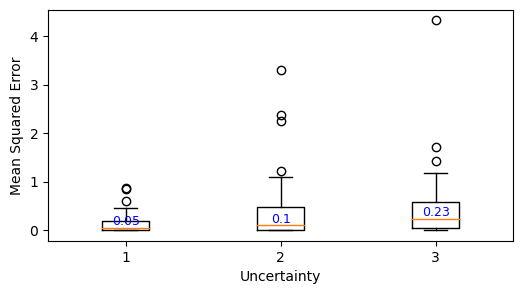

In [129]:
plt.figure(figsize=(6, 3))
plt.boxplot(subsets_mse)
# add labels to each box with the median of that box
for i in range(n_subsets):
    plt.text(i + 1, np.median(subsets_mse[i]), round(np.median(subsets_mse[i]), 2), ha='center', va='bottom', fontsize=9, color='blue')

plt.xlabel('Uncertainty')
plt.ylabel('Mean Squared Error')
#plt.title('Mean Squared Error vs Uncertainty')
plt.show()


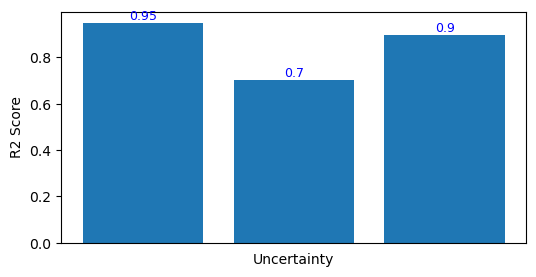

In [130]:
# plot the r2 score for each subset
plt.figure(figsize=(6, 3))
plt.bar(range(n_subsets), subsets_r2)
plt.xlabel('Uncertainty')
plt.ylabel('R2 Score')
#plt.title('R2 Score vs Uncertainty')

# add labels to each bar with the r2 score
for i in range(n_subsets):
    plt.text(i, subsets_r2[i], round(subsets_r2[i], 2), ha='center', va='bottom', fontsize=9, color='blue')

# no need to show the x axis labels
plt.xticks([])

plt.show()


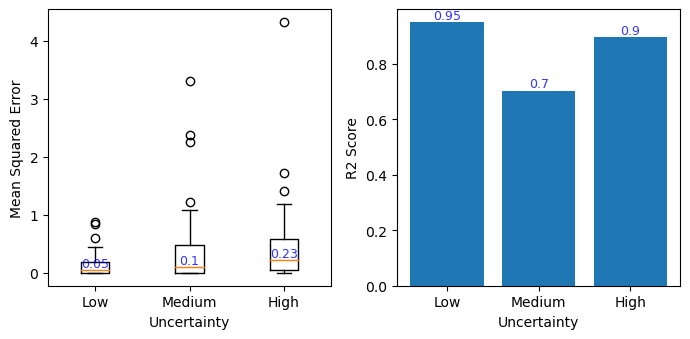

In [150]:
# put these last two plots in one figure for the paper
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

# plot the mse for each subset
ax[0].boxplot(subsets_mse)
# add labels to each box with the median of that box
for i in range(n_subsets):
    ax[0].text(i + 1, np.median(subsets_mse[i]), round(np.median(subsets_mse[i]), 2), ha='center', va='bottom', fontsize=9, color='blue', alpha=0.8)

ax[0].set_xlabel('Uncertainty')
ax[0].set_ylabel('Mean Squared Error')
#ax[0].set_title('Mean Squared Error vs Uncertainty')
ax[0].set_xticks([1,2,3], ['Low', 'Medium', 'High'])

# plot the r2 score for each subset
ax[1].bar(range(n_subsets), subsets_r2)
ax[1].set_xlabel('Uncertainty')
ax[1].set_ylabel('R2 Score')
#ax[1].set_title('R2 Score vs Uncertainty')

# add labels to each bar with the r2 score
for i in range(n_subsets):
    ax[1].text(i, subsets_r2[i], round(subsets_r2[i], 2), ha='center', va='bottom', fontsize=9, color='blue', alpha=0.8)

# no need to show the x axis labels
ax[1].set_xticks([0,1,2], ['Low', 'Medium', 'High'])    
plt.tight_layout()

# save as pdf
plt.savefig('ESOL_subsets.pdf', bbox_inches='tight')

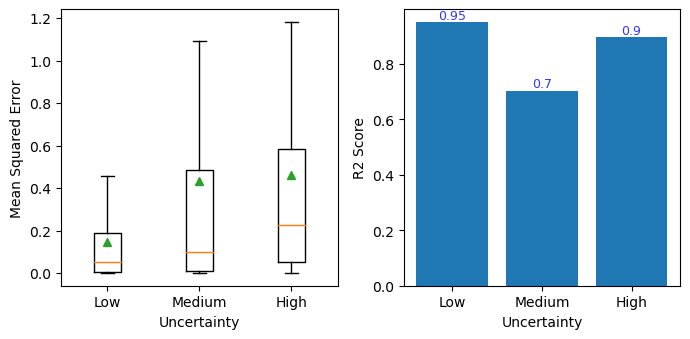

In [267]:
# put these last two plots in one figure for the paper
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

# plot the mse for each subset
ax[0].boxplot(subsets_mse, showfliers=False, showmeans=True)
# add labels to each box with the median of that box
#for i in range(n_subsets):
    #ax[0].text(i + 1, np.median(subsets_mse[i]), round(np.median(subsets_mse[i]), 2), ha='center', va='bottom', fontsize=9, color='blue', alpha=0.8)
    #ax[0].text(i + 1, np.mean(subsets_mse[i]), round(np.mean(subsets_mse[i]), 2), ha='center', va='top', fontsize=9, color='green', alpha=0.8)

ax[0].set_xlabel('Uncertainty')
ax[0].set_ylabel('Mean Squared Error')
#ax[0].set_title('Mean Squared Error vs Uncertainty')
ax[0].set_xticks([1,2,3], ['Low', 'Medium', 'High'])

# plot the r2 score for each subset
ax[1].bar(range(n_subsets), subsets_r2)
ax[1].set_xlabel('Uncertainty')
ax[1].set_ylabel('R2 Score')
#ax[1].set_title('R2 Score vs Uncertainty')

# add labels to each bar with the r2 score
for i in range(n_subsets):
    ax[1].text(i, subsets_r2[i], round(subsets_r2[i], 2), ha='center', va='bottom', fontsize=9, color='blue', alpha=0.8)

# no need to show the x axis labels
ax[1].set_xticks([0,1,2], ['Low', 'Medium', 'High'])    
plt.tight_layout()

# save as pdf
plt.savefig('ESOL_subsets_increase.pdf', bbox_inches='tight')

/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


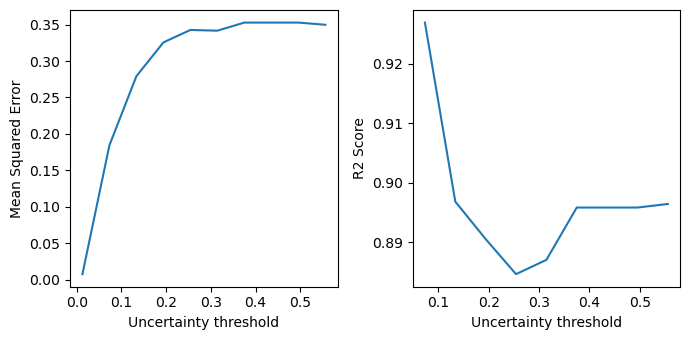

In [193]:
# based on different cutoffs for the uncertainty, calculate the mean squared error and r2 score
cutoffs = np.linspace(data['uq_variance'].min(), data['uq_variance'].max(), 10)
mses = []
r2s = []
for cutoff in cutoffs:
    subset = data[data['uq_variance'] <= cutoff]
    mses.append(metric_result(subset, metric=metrics.mean_squared_error))
    r2s.append(metric_result(subset, metric=metrics.r2_score))

# make two plots, one for mse and one for r2
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

ax[0].plot(cutoffs, mses)
ax[0].set_xlabel('Uncertainty threshold')
ax[0].set_ylabel('Mean Squared Error')
#ax[0].set_title('Mean Squared Error vs Uncertainty')

ax[1].plot(cutoffs, r2s)
ax[1].set_xlabel('Uncertainty threshold')
ax[1].set_ylabel('R2 Score')
#ax[1].set_title('R2 Score vs Uncertainty')

plt.tight_layout()

# save as pdf
plt.savefig('ESOL_cutoffs.pdf', bbox_inches='tight')

plt.show()

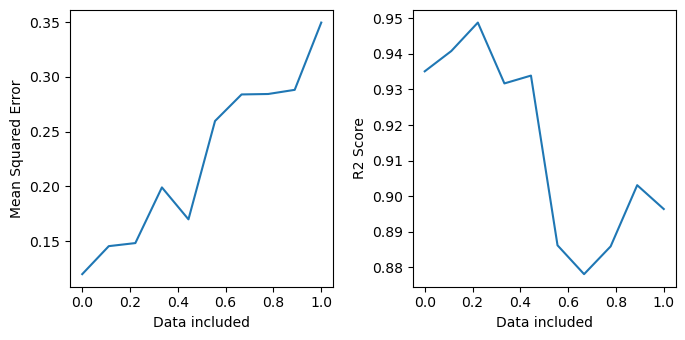

In [190]:
# now do it similarly, but by sorting the data by uncertainty and then taking the first x percent of the data

n = 10
k = 0

cutoffs = np.linspace(0, 1, n)
mses = []
r2s = []
for ns in range(n):
    subset = data.sort_values(by='uq_variance').iloc[:int((ns+1)/n * len(data))]
    mses.append(metric_result(subset, metric=metrics.mean_squared_error))
    r2s.append(metric_result(subset, metric=metrics.r2_score))

# make two plots, one for mse and one for r2
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

ax[0].plot(cutoffs[k:], mses[k:])
ax[0].set_xlabel('Data included')
ax[0].set_ylabel('Mean Squared Error')
#ax[0].set_title('Mean Squared Error vs Uncertainty')

ax[1].plot(cutoffs[k:], r2s[k:])
ax[1].set_xlabel('Data included')
ax[1].set_ylabel('R2 Score')
#ax[1].set_title('R2 Score vs Uncertainty')

plt.tight_layout()

# save as pdf
plt.savefig('ESOL_cutoffs_percentile.pdf', bbox_inches='tight')

plt.show()

In [192]:
data['uq_variance'].max()

0.5558771538469842

# Relation of Predictive uncertainties and explanation uncertainties

In [194]:
data

,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std,pred_label,mse,uq_variance
78,C=CCCC,-2.680,noname,test,-2.683219,-2.569223,-2.659894,-2.408105,-2.560843,-2.452240,-2.746726,-2.734220,-2.572274,-2.538522,-2.592527,0.113129,-2.592527,0.007652,0.012798
803,Clc1ccc(Br)cc1,-3.630,noname,test,-3.370332,-3.171834,-3.131902,-3.231922,-3.342232,-3.356372,-3.268063,-3.397914,-3.359244,-3.573252,-3.320307,0.126441,-3.320307,0.095910,0.015987
698,Cc1ccc(NC(=O)N(C)C)cc1Cl,-3.483,noname,test,-3.116599,-3.022652,-2.901082,-2.747563,-2.817541,-3.020517,-2.813925,-3.175609,-2.953058,-2.928535,-2.949708,0.136955,-2.949708,0.284400,0.018757
980,O=[N+]([O-])c1ccccc1Cl,-2.550,noname,test,-2.837622,-2.348725,-2.518535,-2.532794,-2.520369,-2.759390,-2.593259,-2.631775,-2.704454,-2.689779,-2.613670,0.141680,-2.613670,0.004054,0.020073
439,CCCOC=O,-0.490,noname,test,-0.374759,-0.538310,-0.397887,-0.495502,-0.405871,-0.520717,-0.410189,-0.245790,-0.718912,-0.202173,-0.431011,0.148551,-0.431011,0.003480,0.022067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,O=C1C2(Cl)C3(Cl)C4(Cl)C(Cl)(Cl)C5(Cl)C3(Cl)C1(...,-5.259,noname,test,-6.297841,-5.643655,-5.062365,-5.600204,-6.397878,-6.165500,-6.839499,-5.237710,-5.538187,-6.011424,-5.879426,0.557200,-5.879426,0.384929,0.310472
1013,OCC1OC(OCC2OC(OC3(CO)OC(CO)C(O)C3O)C(O)C(O)C2O...,-0.410,noname,test,0.752194,-0.196672,1.200980,0.225720,0.848138,0.108557,0.543358,1.153142,-0.413055,0.897113,0.511947,0.558609,0.511947,0.849987,0.312044
984,O=c1[nH]c2c(c(=O)n1C1CCCCC1)CCC2,-4.594,noname,test,-3.047447,-2.877509,-3.126079,-3.855846,-4.000408,-4.340405,-4.396691,-2.766955,-3.343522,-3.308567,-3.506343,0.597919,-3.506343,1.182997,0.357508
1057,c1cc2ccc3ccc4ccc5ccc6ccc1c1c2c3c4c5c61,-9.332,noname,test,-10.008544,-10.801707,-8.983833,-9.591684,-10.216329,-9.967518,-10.665087,-10.834500,-9.978229,-10.811379,-10.185881,0.609371,-10.185881,0.729113,0.371333


In [195]:
# load data
data_smask_fg = pd.read_csv(data_path_smask_fg)
data_smask_brics = pd.read_csv(data_path_smask_brics)
data_smask_brics_emerge = pd.read_csv(data_path_smask_brics_emerge)
data_smask_murcko = pd.read_csv(data_path_smask_murcko)
data_smask_murcko_emerge = pd.read_csv(data_path_smask_murcko_emerge)

data_smask_fg_attribution = pd.read_csv(path_smask_fg_attribution)
data_smask_brics_attribution = pd.read_csv(path_smask_brics_attribution)
data_smask_brics_emerge_attribution = pd.read_csv(path_smask_brics_emerge_attribution)
data_smask_murcko_attribution = pd.read_csv(path_smask_murcko_attribution)
data_smask_murcko_emerge_attribution = pd.read_csv(path_smask_murcko_emerge_attribution)

In [199]:
# always only keep the test set 
data_smask_fg = data_smask_fg[data_smask_fg['group'] == 'test'].reset_index(drop=True)
data_smask_brics = data_smask_brics[data_smask_brics['group'] == 'test'].reset_index(drop=True)
data_smask_brics_emerge = data_smask_brics_emerge[data_smask_brics_emerge['group'] == 'test'].reset_index(drop=True)
data_smask_murcko = data_smask_murcko[data_smask_murcko['group'] == 'test'].reset_index(drop=True)
data_smask_murcko_emerge = data_smask_murcko_emerge[data_smask_murcko_emerge['group'] == 'test'].reset_index(drop=True)

data_smask_fg_attribution = data_smask_fg_attribution[data_smask_fg_attribution['group'] == 'test'].reset_index(drop=True)
data_smask_brics_attribution = data_smask_brics_attribution[data_smask_brics_attribution['group'] == 'test'].reset_index(drop=True)
data_smask_brics_emerge_attribution = data_smask_brics_emerge_attribution[data_smask_brics_emerge_attribution['group'] == 'test'].reset_index(drop=True)
data_smask_murcko_attribution = data_smask_murcko_attribution[data_smask_murcko_attribution['group'] == 'test'].reset_index(drop=True)
data_smask_murcko_emerge_attribution = data_smask_murcko_emerge_attribution[data_smask_murcko_emerge_attribution['group'] == 'test'].reset_index(drop=True)

data_mol = data_mol[data_mol['group'] == 'test'].reset_index(drop=True)


In [201]:
def uncertainty_of_attributions(data_attributions, data_mol, data_smasks, method='UQ_substructure'):
    """ 
    Calculate the uncertainty of the explanations for the substructure masks.
    """

    if method == 'UQ_substructure':
        """ 
        for this method, we will calculate the attribution score for each ensemble member seperatly, and then calculate the variance of these scores.
        """
        for idx in range(len(data_smasks)):

            for i in range(10):
                pred_smasks = data_smasks[f'pred_{i+1}'][idx]
                smiles = data_smasks['smiles'][idx]
                pred_mol= data_mol[data_mol['smiles'] == smiles][f'pred_{i+1}'].values[0]

                attribution = pred_mol - pred_smasks
                data_attributions.at[idx, f'attribution_{i+1}'] = attribution

            
        attr_variance = data_attributions[[f'attribution_{i+1}' for i in range(10)]].var(axis=1)
        data_attributions['uq_variance'] = attr_variance

        attr_mean = data_attributions[[f'attribution_{i+1}' for i in range(10)]].mean(axis=1)
        data_attributions['attribution_mean'] = attr_mean



    return data_attributions

            

In [207]:
# uncertainties of the explanations
def UQ_explanations(data): 
    """
    Calculate the uncertainty of the explanations for each molecule (i.e. for each unique smiles). 
    We use 4 different methods to calculate the uncertainty of the explanations:
    1. UX_highest  : The uncertainty is the maximum uncertainty of the substructure masks for this molecule (i.e. we only care about the uncertainty of the best explanation)
    2. UX_all      : The uncertainty is the sum of the uncertaintie of the different substructure masks for this molecule (i.e. take all possible explanations into account)
    3. UX_weighted : Same as UX_all, but the uncertainty is weighted by the absolute attribution score for each substructure mask
    4. UX_scaled   : Same as UX_weighted, but the weights are the fraction of the absolute attribution score for the substructure masks over all absolution attribution scores for all substructure masks or this molecule
    """


    # get the unique list of molecules from the data
    smiles_list = data['smiles'].unique()

    # create a new dataframe to store the results
    data_UQ = pd.DataFrame(columns=['smiles', 'label', 'ensemble_pred', 'ensemble_uncertainty', 'UX_highest', 'UX_all', 'UX_weighted', 'UX_scaled'])

    # iterate over the molecules
    for smiles in smiles_list: 

        smasks = data[data['smiles'] == smiles] # this will be a dataframe containing one row per substructure mask for this molecule
        
        # label and ensemble prediction are the same for all substructure masks, so we can just take the first value
        label = smasks['label'].values[0]
        ensemble_pred = smasks['mol_pred_mean'].values[0]

        # calculate the uncertainty of the ensemble prediction; this is the variance of the predictions of the ensemble members
        ensemble_uncertainty = smasks['mol_pred_std'].values[0] ** 2

        # calculate the uncertainty of the explanations
        UX_highest = smasks['uq_variance'].max()
        UX_all = smasks['uq_variance'].sum()
        UX_weighted = (smasks['uq_variance'] * smasks['attribution'].abs()).sum()
        UX_scaled = (smasks['uq_variance'] * smasks['attribution'].abs() / smasks['attribution'].abs().sum()).sum()

        # add the results to the dataframe by adding a new row 
        data_UQ = data_UQ.append({'smiles': smiles, 'label': label, 'ensemble_pred': ensemble_pred, 'ensemble_uncertainty': ensemble_uncertainty, 'UX_highest': UX_highest, 'UX_all': UX_all, 'UX_weighted': UX_weighted, 'UX_scaled': UX_scaled}, ignore_index=True)

    return data_UQ





In [210]:
def correlation(X, data, filename="x"):
    # make 4 plots for the 4 different methods to calculate the uncertainty of the explanations. Plot relationship between the uncertainty of the explanations and the uncertainty of the ensemble prediction
    plt.figure(figsize=(5, 5))
    plt.subplot(2, 2, 1)
    plt.scatter(X, data['UX_highest'], alpha=0.3)
    # add function that approximates the relationship in the data
    p = np.poly1d(np.polyfit(X, data['UX_highest'], 1))
    t = np.linspace(X.min(), X.max(), 100)
    plt.plot(t, p(t), 'r--', label="corr: " + str(round(X.corr(data['UX_highest']), 2)))
    plt.legend()
    plt.xlabel('Predictive uncertainty')
    plt.ylabel('UX_highest')
    plt.title('UX_highest')


    plt.subplot(2, 2, 2)
    plt.scatter(X, data['UX_all'], alpha=0.3)
    p = np.poly1d(np.polyfit(X, data['UX_all'], 1))
    t = np.linspace(X.min(), X.max(), 100)
    plt.plot(t, p(t), 'r--', label="corr: " + str(round(X.corr(data['UX_all']), 2)))
    plt.legend()
    plt.xlabel('Predictive uncertainty')
    plt.ylabel('UX_all')
    plt.title('UX_all')
    plt.subplot(2, 2, 3)
    plt.scatter(X, data['UX_weighted'], alpha=0.3)
    p = np.poly1d(np.polyfit(X, data['UX_weighted'], 1))
    t = np.linspace(X.min(), X.max(), 100)
    plt.plot(t, p(t), 'r--', label="corr: " + str(round(X.corr(data['UX_weighted']), 2)))
    plt.legend()
    plt.xlabel('Predictive uncertainty')
    plt.ylabel('UX_weighted')
    plt.title('UX_weighted')
    plt.subplot(2, 2, 4)
    plt.scatter(X, data['UX_scaled'], alpha=0.3)
    p = np.poly1d(np.polyfit(X, data['UX_scaled'], 1))
    t = np.linspace(X.min(), X.max(), 100)
    plt.plot(t, p(t), 'r--', label="corr: " + str(round(X.corr(data['UX_scaled']), 2)))
    plt.legend()
    plt.xlabel('Predictive uncertainty')
    plt.ylabel('UX_scaled')
    plt.title('UX_scaled')
    plt.tight_layout()

    plt.savefig("ESOL_" + filename + "_correlation_UQ_UXUQ.pdf", bbox_inches='tight')

    plt.show()

In [212]:
data_smask_fg_attribution_UQ_test = uncertainty_of_attributions(data_smask_fg_attribution, data_mol, data_smask_fg)
data_smask_brics_attribution_UQ_test = uncertainty_of_attributions(data_smask_brics_attribution, data_mol, data_smask_brics)
data_smask_murcko_attribution_UQ_test = uncertainty_of_attributions(data_smask_murcko_attribution, data_mol, data_smask_murcko)
# save as csv
data_smask_fg_attribution_UQ_test.to_csv('ESOL_fg_attribution_UQ_test.csv', index=False)
data_smask_brics_attribution_UQ_test.to_csv('ESOL_brics_attribution_UQ_test.csv', index=False)
data_smask_murcko_attribution_UQ_test.to_csv('ESOL_murcko_attribution_UQ_test.csv', index=False)

In [213]:
data_UQ_fg_test = UQ_explanations(data_smask_fg_attribution_UQ_test)
data_UQ_brics_test = UQ_explanations(data_smask_brics_attribution_UQ_test)
data_UQ_murcko_test = UQ_explanations(data_smask_murcko_attribution_UQ_test)

# save as csv
data_UQ_fg_test.to_csv('ESOL_fg_UQ_test.csv', index=False)
data_UQ_brics_test.to_csv('ESOL_brics_UQ_test.csv', index=False)
data_UQ_murcko_test.to_csv('ESOL_murcko_UQ_test.csv', index=False)

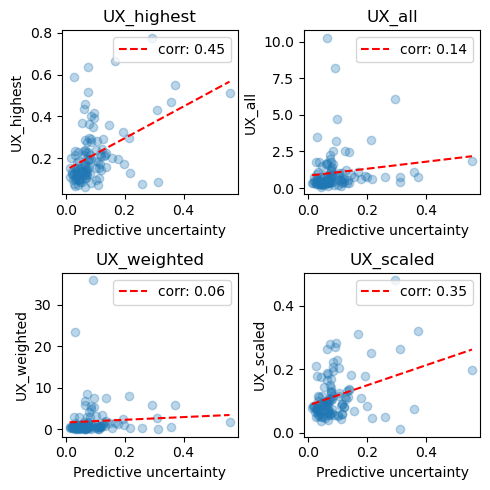

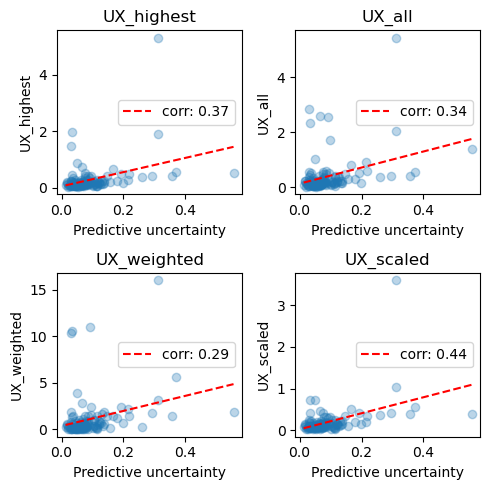

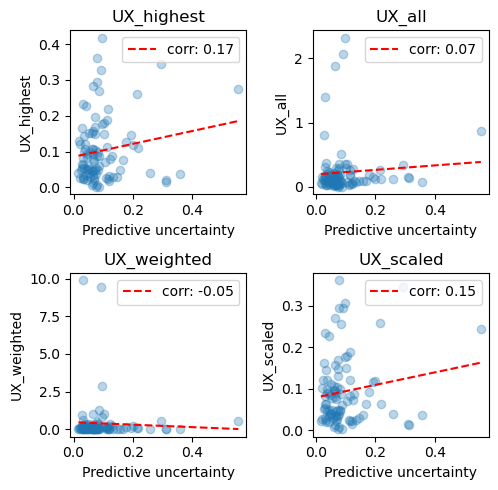

In [214]:
correlation(data_UQ_brics_test['ensemble_uncertainty'], data_UQ_brics_test, filename="brics")
correlation(data_UQ_murcko_test['ensemble_uncertainty'], data_UQ_murcko_test, filename="murcko")
correlation(data_UQ_fg_test['ensemble_uncertainty'], data_UQ_fg_test, filename="fg")

# Evaluation of Relation of Explanation Uncertainty to Correctness of Prediction

In [221]:
def generate_subset(data, column_name, ascending=True, bins=10, linear=False):

    # sort data by the softmax score with high scores first
    data_sorted = data.sort_values(by=column_name, ascending=ascending)

    subsets = []

    # iterate over the data and calculate the accuracies when only using the top n predictions. Do this in steps corresponding to percentages
    if not linear:
        for i in range(1, bins+1):
            # the subset is the data from row 0 to row i
            subset = data_sorted.iloc[int((i-1)/bins * len(data_sorted)):int(i/bins * len(data_sorted))]
            subsets.append(subset)
    else:
        # make bins represent a linear representation of uncertainty scores between min and max value that appear
        min_val = data_sorted[column_name].min()
        max_val = data_sorted[column_name].max()
        stepsize = (max_val - min_val) / bins
        for i in range(1, bins+1):
            subset = data_sorted[(data_sorted[column_name] >= min_val + (i-1) * stepsize) & (data_sorted[column_name] < min_val + i * stepsize)]
            subsets.append(subset)

    return subsets

In [272]:
def subsets_by_UQ_plot(data, ascending=True, bins=10, linear=False, title="", name="", legend=False, printVals=False, save=True):
    
    subsets_UX_highest = generate_subset(data, 'UX_highest', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_all = generate_subset(data, 'UX_all', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_weighted = generate_subset(data, 'UX_weighted', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_scaled = generate_subset(data, 'UX_scaled', ascending=ascending, bins=bins, linear=linear)

    # calculate MSE and R2 for each subset
    mse_UX_highest = [metrics.mean_squared_error(subset['label'], subset['ensemble_pred']) for subset in subsets_UX_highest]
    mse_UX_all = [metrics.mean_squared_error(subset['label'], subset['ensemble_pred']) for subset in subsets_UX_all]
    mse_UX_weighted = [metrics.mean_squared_error(subset['label'], subset['ensemble_pred']) for subset in subsets_UX_weighted]
    mse_UX_scaled = [metrics.mean_squared_error(subset['label'], subset['ensemble_pred']) for subset in subsets_UX_scaled]

    r2_UX_highest = [metrics.r2_score(subset['label'], subset['ensemble_pred']) for subset in subsets_UX_highest]
    r2_UX_all = [metrics.r2_score(subset['label'], subset['ensemble_pred']) for subset in subsets_UX_all]
    r2_UX_weighted = [metrics.r2_score(subset['label'], subset['ensemble_pred']) for subset in subsets_UX_weighted]
    r2_UX_scaled = [metrics.r2_score(subset['label'], subset['ensemble_pred']) for subset in subsets_UX_scaled]

    mse_all = metrics.mean_squared_error(data['label'], data['ensemble_pred'])
    r2_all = metrics.r2_score(data['label'], data['ensemble_pred'])

    # print the mse and r2 for the different subsets
    if printVals:
        print("MSE for UX_highest", mse_UX_highest)
        print("MSE for UX_all", mse_UX_all)
        print("MSE for UX_weighted", mse_UX_weighted)
        print("MSE for UX_scaled", mse_UX_scaled)

        print("R2 for UX_highest", r2_UX_highest)
        print("R2 for UX_all", r2_UX_all)
        print("R2 for UX_weighted", r2_UX_weighted)
        print("R2 for UX_scaled", r2_UX_scaled)

        print("MSE for all data", mse_all)
        print("R2 for all data", r2_all)
  

    # plot two subplots for mse and r2 score
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))

    ax[0].plot(range(1, bins+1), mse_UX_highest, label='UX_highest')
    ax[0].plot(range(1, bins+1), mse_UX_all, label='UX_all')
    ax[0].plot(range(1, bins+1), mse_UX_weighted, label='UX_weighted')
    ax[0].plot(range(1, bins+1), mse_UX_scaled, label='UX_scaled')
    ax[0].axhline(y=mse_all, color='black', linestyle='--', label='All data')
    ax[0].set_xlabel('Uncertainty')
    ax[0].set_ylabel('Mean Squared Error')
    xlabels =['' for i in range(bins)]
    xlabels[0] = 'low'
    xlabels[-1] = 'high'
    ax[0].set_xticks(range(1, bins+1))
    ax[0].set_xticklabels(xlabels)
    if legend:
        ax[0].legend()

    ax[1].plot(range(1, bins+1), r2_UX_highest, label='UX_highest')
    ax[1].plot(range(1, bins+1), r2_UX_all, label='UX_all')
    ax[1].plot(range(1, bins+1), r2_UX_weighted, label='UX_weighted')
    ax[1].plot(range(1, bins+1), r2_UX_scaled, label='UX_scaled')
    ax[1].axhline(y=r2_all, color='black', linestyle='--', label='All data')
    ax[1].set_xlabel('Uncertainty')
    ax[1].set_ylabel('R2 Score')
    ax[1].set_xticks(range(1, bins+1))
    ax[1].set_xticklabels(xlabels)
    #ax[1].legend()

    plt.suptitle(title)

    
    if save:
        plt.savefig('ESOL_performance_plot_by_UXUQ_likelihood_l_' + name + '.pdf', bbox_inches='tight')

    plt.show()


In [280]:
def uncertainty_of_attributions_NEW(data_attributions, data_mol, data_smasks, method='UQ_substructure'):
    """ 
    Calculate the uncertainty of the explanations for the substructure masks.
    """

    if method == 'UQ_substructure':
        """ 
        for this method, we will calculate the attribution score for each ensemble member seperatly, and then calculate the variance of these scores.
        """


        for idx in range(len(data_smasks)):

            smiles = data_smasks['smiles'][idx]

            for i in range(10):
                pred_smasks = data_smasks[f'pred_{i+1}'][idx]
                pred_mol = data_mol[data_mol['smiles'] == smiles][f'pred_{i+1}'].values[0]

                attribution = pred_mol - pred_smasks
                data_attributions.at[idx, f'attribution_{i+1}'] = attribution

            # get the correct labels for the molecule
            label = data_mol[data_mol['smiles'] == smiles]['label'].values[0]
            data_attributions.at[idx, 'label'] = label
                                                                               

            
        attr_variance = data_attributions[[f'attribution_{i+1}' for i in range(10)]].var(axis=1)
        data_attributions['uq_variance'] = attr_variance

        attr_mean = data_attributions[[f'attribution_{i+1}' for i in range(10)]].mean(axis=1)
        data_attributions['attribution_mean'] = attr_mean



    return data_attributions

            

In [290]:
data_attributions_NEW_fg = uncertainty_of_attributions_NEW(data_smask_fg_attribution, data_mol, data_smask_fg)
data_attributions_NEW_brics = uncertainty_of_attributions_NEW(data_smask_brics_attribution, data_mol, data_smask_brics)
data_attributions_NEW_murcko = uncertainty_of_attributions_NEW(data_smask_murcko_attribution, data_mol, data_smask_murcko)

In [291]:
UQ_exp_fg = UQ_explanations(data_attributions_NEW_fg)
UQ_exp_brics = UQ_explanations(data_attributions_NEW_brics)
UQ_exp_murcko = UQ_explanations(data_attributions_NEW_murcko)


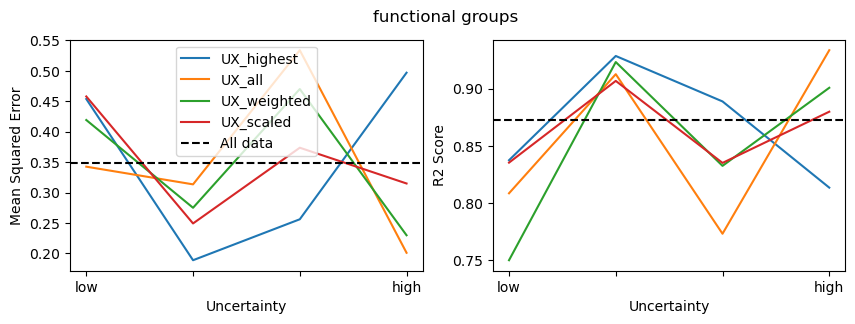

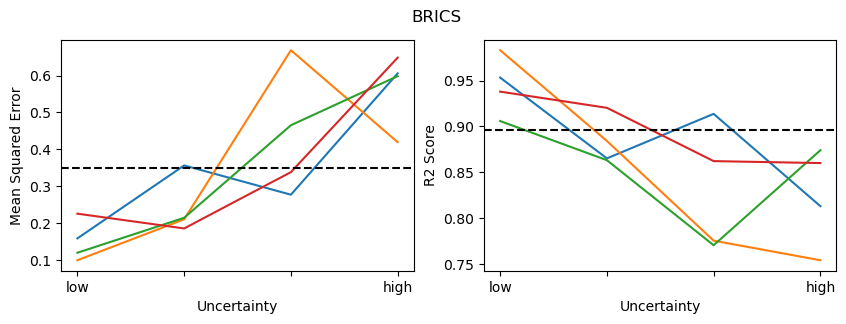

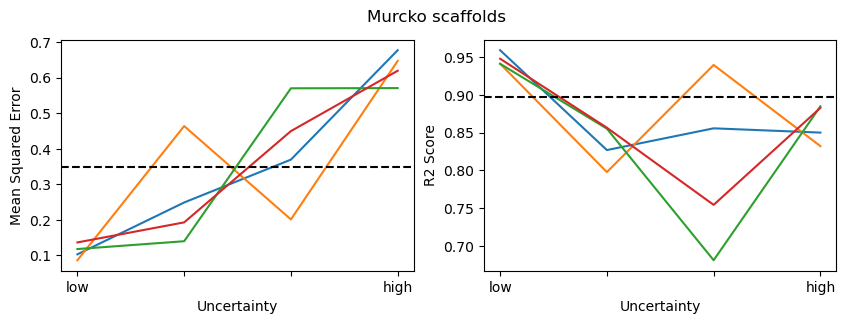

In [293]:
bins = 4

subsets_by_UQ_plot(UQ_exp_fg, title='functional groups', name="fg_fixed", bins=bins, legend=True)
subsets_by_UQ_plot(UQ_exp_brics, title='BRICS', name="brics_fixed", bins=bins)
subsets_by_UQ_plot(UQ_exp_murcko, title='Murcko scaffolds', name="murcko_fixed", bins=bins)